In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
def plot_feature_correlation(df, feature1, feature2, target_col=None, 
                           regression=False, method='spearman'):
    """
    Plots the pairwise correlation with additional information.
    
    Parameters:
        df (pd.DataFrame): Source dataset
        feature1 (str): The first feature
        feature2 (str): The second feature
        target_col (str): Optional - target variable for color coding
        regression (bool): Add a regression line
        method (str): The correlation method
    """
    plt.figure(figsize=(10, 8))
    
    if method == 'spearman':
        corr, _ = spearmanr(df[feature1], df[feature2])
    else:
        corr = df[feature1].corr(df[feature2], method=method)
    
    if target_col:
        scatter = sns.scatterplot(data=df, x=feature1, y=feature2, 
                                hue=target_col, palette='viridis', 
                                alpha=0.7, s=100)
        plt.legend(title=target_col)
    else:
        scatter = sns.scatterplot(data=df, x=feature1, y=feature2, 
                                alpha=0.7, s=100)
    
    if regression:
        sns.regplot(data=df, x=feature1, y=feature2, 
                   scatter=False, color='red', ci=None)
    
    plt.annotate(f'{method.upper()} correlation: {corr:.2f}', 
                xy=(0.7, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle='round', fc='white', ec='gray', alpha=0.8))
    
    plt.title(f'Корреляция между {feature1} и {feature2}', pad=15)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return corr

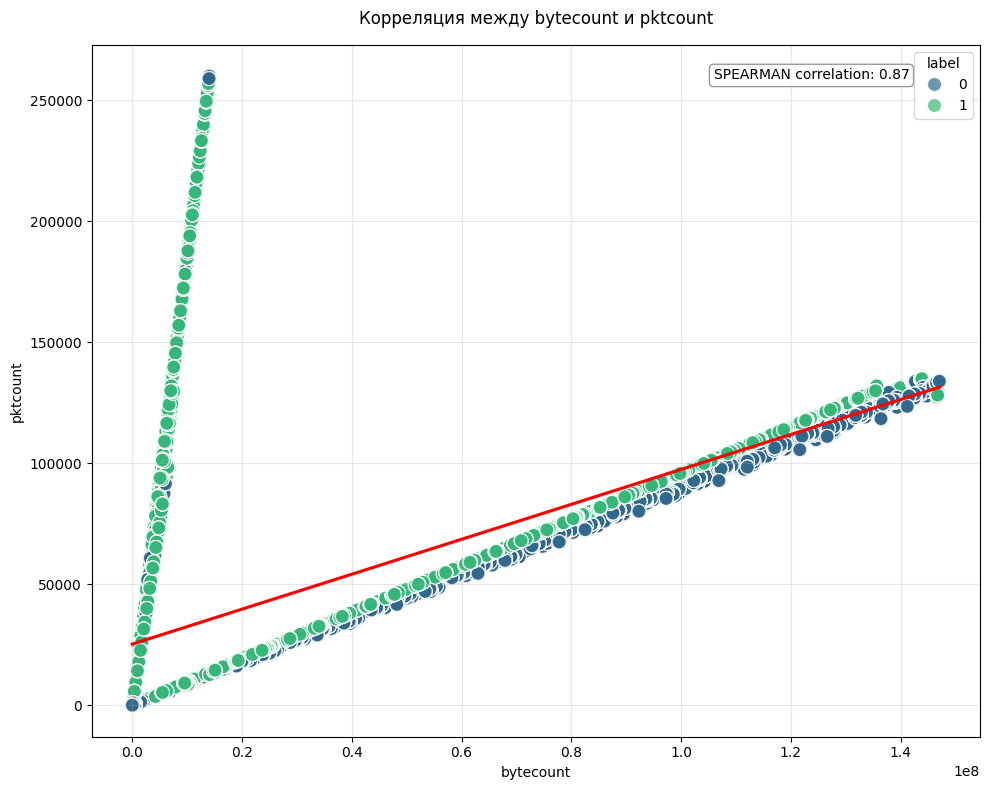

0.8725665540590614

In [3]:
data = pd.read_csv('dataset_sdn.csv')

plot_feature_correlation(
    df=data,
    feature1='bytecount',
    feature2='pktcount',
    target_col='label',
    regression=True,
    method='spearman'
)

In [4]:
from sklearn.preprocessing import LabelEncoder
df_normal = pd.read_csv("Normal_data.csv")
df_metasploitable = pd.read_csv("metasploitable-2.csv")
df_OVS = pd.read_csv("OVS.csv")
df_combined = pd.concat([df_normal, df_metasploitable, df_OVS], axis=0, ignore_index=True)

label_encoder = LabelEncoder()
df_combined['Label_encoded'] = label_encoder.fit_transform(df_combined['Label'])
print("Соответствие классов:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Соответствие классов: {'BFA': 0, 'BOTNET': 1, 'DDoS': 2, 'DDoS ': 3, 'DoS': 4, 'Normal': 5, 'Probe': 6, 'U2R': 7, 'Web-Attack': 8}


In [5]:
def analyze_multiclass_correlation(df, target_col, threshold=0.85, method='spearman'):
    """
    Correlation analysis for multiclass classification.
    
    Parameters:
        df (pd.DataFrame): Source dataset
        target_col (str): Numeric target variable
        threshold (float): Correlation threshold for exclusion of features
        method (str): Correlation method ('pearson', 'spearman')
    
    Returns:
        pd.DataFrame: Correlation matrix
        list: Signs for exclusion
    """
    numeric_df = df.select_dtypes(include=['number'])
    
    if target_col not in numeric_df.columns:
        raise ValueError(f"Целевая переменная {target_col} отсутствует или не является числовой")
    
    corr_matrix = numeric_df.corr(method=method)
    
    plt.figure(figsize=(15, 12))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
                center=0, annot_kws={"size": 8})
    plt.title(f'Матрица корреляции (метод: {method})', pad=20)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    corr_with_target = corr_matrix[target_col].abs().sort_values(ascending=False)
    high_corr_features = corr_with_target[corr_with_target > threshold].index.tolist()
    high_corr_features.remove(target_col)
    return corr_matrix, high_corr_features

Признаки с высокой корреляцией с целевой переменной: []


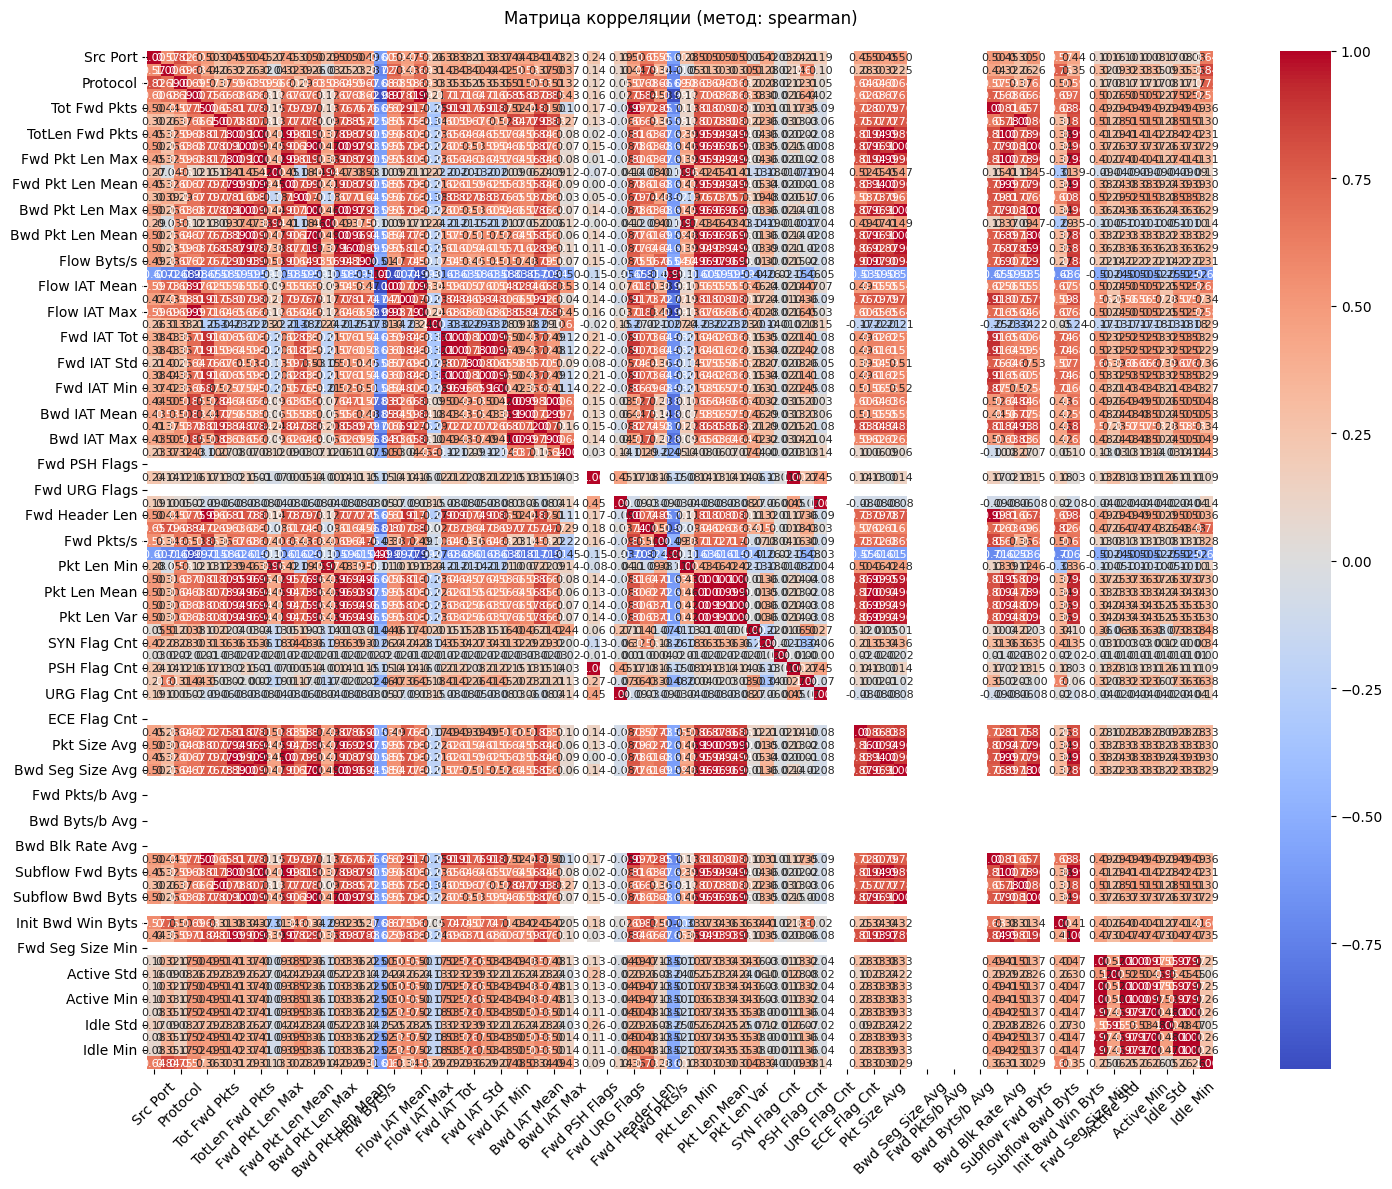

In [6]:
corr_matrix, to_drop = analyze_multiclass_correlation(
    df=df_combined,
    target_col='Label_encoded',
    threshold=0.85,
    method='spearman'
)

print("Признаки с высокой корреляцией с целевой переменной:", to_drop)